___
# 3.How well do jobs and skills pay for Data Analysts?

## Methodology
1.  Evaluate median salary for all data jobs
2.  Find median salary per skill for Data Analysts
3.  Visualize for highest paying skills
4.  Visualize for highest demanded skills

## Original Exploration
* `18_Matplotlib_Box_Plots.ipynb`
* `19_Exercise_Skill_Pay_Analysis.ipynb`
___

In [35]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [37]:
df_Egy= df[df['job_country'] == 'Egypt'].dropna(subset=['salary_year_avg'])

In [43]:
job_titles= df_Egy['job_title_short'].value_counts().index[:3].to_list()
job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [ ]:
df_Egy_top6= df_Egy[df_Egy['job_title_short'].isin(job_titles)]

C:\Users\go\AppData\Local\Temp\ipykernel_9668\2981954736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Egy_top6, x='salary_year_avg', y='job_title_short', palette='mako')


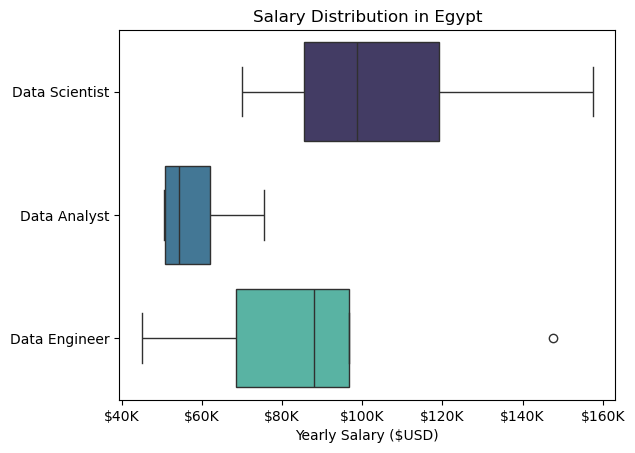

In [ ]:
sns.boxplot(data=df_Egy_top6, x='salary_year_avg', y='job_title_short', palette='mako')

plt.title('Salary Distribution in Egypt')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

## Investigating median salary vs skill for data analysis

In [51]:
df_DA_Egy=df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Egypt')].copy()
df_Egy= df_Egy.dropna(subset=['salary_year_avg'])

In [53]:
df_Egy= df_Egy.explode('job_skills')

In [61]:
df_Egy_top10_median= df_Egy.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_Egy_top10_median= df_Egy_top10_median.head(10)
df_Egy_top10_median

,count,median
job_skills,,
git,1,166000.0
keras,1,166000.0
jira,1,166000.0
numpy,1,166000.0
pandas,1,166000.0
pytorch,1,166000.0
linux,2,161750.0
matlab,1,157500.0
shell,1,157500.0


In [60]:
df_Egy_top10_count= df_Egy.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_Egy_top10_count= df_Egy_top10_count.head(10)
df_Egy_top10_count

,count,median
job_skills,,
python,14,90670.0
sql,13,90670.0
mongodb,6,90670.0
scala,6,96773.0
sas,6,90670.0
excel,5,79200.0
r,5,70000.0
spark,5,90670.0
aws,5,96773.0


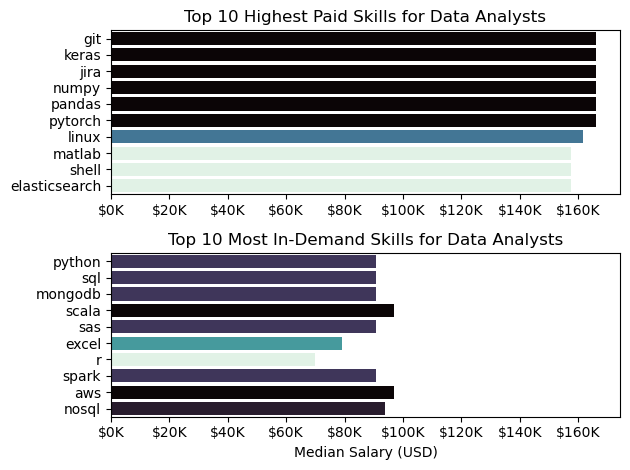

In [64]:
fig, ax = plt.subplots(2, 1)


sns.barplot(data=df_Egy_top10_median, x='median', y=df_Egy_top10_median.index, ax=ax[0], hue='median', palette='mako_r') # _r to reverse the palette
ax[0].legend_.remove()

#df_DA_top_pay[:-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [:-1] to exclude the last row which is "nan"
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

###############################################################################################

sns.barplot(data=df_Egy_top10_count, x='median', y=df_Egy_top10_count.index, ax=ax[1], hue='median', palette='mako_r') # _r to reverse the palette
ax[1].legend_.remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

